# Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

## Step-01: Download Wikipedia Chinese Corpus

第一步：使用维基百科下载中文语料库

https://dumps.wikimedia.org/zhwiki/20190720/

## Step-02: Using wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

https://github.com/attardi/wikiextractor

执行：

```shell
> python WikiExtractor.py -o .\output D:\BaiduYunDownload\维基百科中文20190720\zhwiki-20190720-pages-articles-multistream.xml.bz2
```


## Step-03: Using gensim get word vectors:
Reference:

https://radimrehurek.com/gensim/models/word2vec.html

https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.



### 3.1 Cut words

In [49]:
import os
import pandas as pd
import jieba.analyse
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.word2vec import PathLineSentences


corpus_path = 'E:\\GitHub\\wikiextractor\\output' #source corpus path
sentences_path = 'E:\\corpus' #words corpus path

In [35]:
def get_all_files(root_path):
    """
    return all file pathes as a list under one directory
    """
    pathes = []
    for root, dirs, files in os.walk(corpus_path):
        if not files:
            continue
        for file in files:
            pathes.append(root + '\\' + file)
    return pathes

In [42]:
def preprocess_text(text):
    """
    preprocess text, drop number, blank, stopwords
    return segments list
    """
    stopwords=pd.read_csv('.\\stopwords.txt',index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
    stopwords=stopwords['stopword'].values
    
    try:
        segs = list(jieba.cut(text))
        segs = [v for v in segs if not str(v).isdigit()]#去数字
        segs = list(filter(lambda x:x.strip(), segs)) #去左右空格
        segs = list(filter(lambda x:len(x)>1, segs))#长度为1的字符
        segs = list(filter(lambda x:x not in stopwords, segs)) #去掉停用词
    except Exception:
        print(Exception)
    return segs

e:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
e:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [50]:
"""
generate new files after cutting words
"""
file_pathes = get_all_files(corpus_path)

limit = 10000
i = 0

for file_path in file_pathes:
    with open(file_path, 'r', encoding='utf-8') as rf:
        with open(sentences_path+'\\'+str(i)+'.txt', 'w+', encoding='utf-8') as wf:
            for line in rf.readlines():
                if line == '\n':
                    continue
                if line[0] == '<':
                    continue
                i += 1
                segs = preprocess_text(line)
                wf.write(' '.join(segs))
    if i > limit:
        break

In [51]:
sentences = PathLineSentences(sentences_path, limit=1)

'''
LineSentence(inp)：格式简单：一句话=一行; 单词已经过预处理并被空格分隔。
size：是每个词的向量维度； 
window：是词向量训练时的上下文扫描窗口大小，窗口为5就是考虑前5个词和后5个词； 
min-count：设置最低频率，默认是5，如果一个词语在文档中出现的次数小于5，那么就会丢弃； 
workers：是训练的进程数（需要更精准的解释，请指正），默认是当前运行机器的处理器核数。这些参数先记住就可以了。
sg ({0, 1}, optional) – 模型的训练算法: 1: skip-gram; 0: CBOW
alpha (float, optional) – 初始学习率
iter (int, optional) – 迭代次数，默认为5
'''
model = Word2Vec(sentences=sentences, size=100, window=5, min_count=1, sg=1)

model.save(".\\word2vec.model")

e:\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Step-04: Using some words to test your preformance.

第四步，测试同义词，找几个单词。

In [54]:
print(model['中国'])

[ 0.32242677  0.12971713  0.2020709   0.3632374   0.9222486  -0.55811554
 -0.28390476  0.28367355  0.1964107  -0.21977392 -0.06444634  0.16362631
  0.03197181  0.19361655 -0.16852972 -0.01497601  0.87039506 -0.28291765
 -0.06348117  0.3588286  -0.6118939  -0.2945417  -0.46971563 -0.5631982
  0.34107518 -0.08078215 -1.232944    0.1503928  -0.06569257  0.07252707
 -0.8946868   0.5967637   0.5617484   0.36433455 -0.05487395  0.6541698
 -0.13211599 -0.33732408  0.31179795  0.32845244  0.11792107 -0.3170439
 -0.19777887 -0.57849216 -0.15530036  0.445071   -0.23603877 -0.14478168
 -0.3815146   0.8960201   0.298135    0.09621727  0.4851041   0.03529807
 -0.92373455  0.14742832 -0.02569527 -0.21468323  0.3877639  -0.2643373
 -0.19145395 -0.49811006 -0.2772722   0.16501157 -0.17221622 -0.5216831
 -0.05388469  0.6187258  -0.41403374  0.14545973 -0.5051723   0.19265892
 -0.6928579   0.2558732  -0.41839534 -0.7749304   0.08568496 -0.5544341
 -0.5532263   0.22697765 -0.42497575  0.23071884  0.12475

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [55]:
print(model['北京'])

[ 0.5007452   0.10219055 -0.32905862  0.11369596  0.7433472  -0.04048169
 -0.40990755  0.22003876  0.02057978 -0.42945328 -0.16393243 -0.18261424
 -0.22520319  0.14518121 -0.0525115  -0.11810838  0.41022584 -0.14147696
  0.31358632  0.3409524  -0.4367431   0.4189133  -0.04084573 -0.6241634
  0.07543996 -0.06181612 -0.8216611   0.30633673 -0.07451538  0.2397082
 -0.32713944  0.15042588  0.37081626  0.11423954  0.15377311  0.35698316
  0.03006061  0.02773372  0.4609735   0.10990081  0.07908319 -0.16551732
  0.18416736 -0.23363319 -0.48199022  0.00179261  0.30570132 -0.28700334
 -0.14028281  0.47954333 -0.06488842 -0.11705579  0.15717424 -0.00782508
 -0.49156383  0.18056244  0.31305757  0.00255206  0.21876153 -0.18654749
  0.20955521 -0.41260055 -0.34611264  0.25265303 -0.00279441 -0.3569383
 -0.25085923  0.20668027 -0.17850289  0.04928784 -0.51274717 -0.04985979
 -0.3842528   0.20844556 -0.30001938 -0.5342532   0.1900018   0.08399962
 -0.5444809   0.5911435  -0.08231807  0.07196554  0.18

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [56]:
print(model['袁世凯'])

[ 0.18818612  0.05914191 -0.46481448 -0.09066724  0.39920747  0.38367796
 -0.722312    0.05082085  0.07305121 -0.41403073 -0.20223632 -0.13346133
 -0.3583985  -0.05723323  0.04368744  0.24109672  0.13027646 -0.11257724
  0.13885616  0.14313225 -0.23422834  0.18115498  0.28590676 -0.19023846
 -0.03333521 -0.010207   -0.82052076  0.46401957  0.10739937  0.26979136
 -0.1804987   0.5027365   0.46676564  0.13664642  0.28820288  0.23880954
  0.16560265 -0.12516342  0.585944   -0.14872144  0.11497646 -0.30897352
  0.04645425  0.05566444 -0.4432086  -0.14166217  0.33963412 -0.1946155
 -0.24318226  0.8164626  -0.16104457 -0.34987578  0.09355684 -0.20611012
 -0.19640651  0.18445201  0.18920024  0.08458568  0.1703575  -0.40404052
  0.2120697  -0.47506446 -0.46961927  0.44609952  0.35195532 -0.41860363
  0.10224506 -0.01112052  0.38819352  0.1411015  -0.41493973 -0.35139906
 -0.24966563 -0.00126147 -0.57345897 -0.57567614 -0.08771753  0.4757634
 -0.3937756   0.341965   -0.1304231  -0.17436333  0.0

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## Step-05: Using visualization tools

https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

E:\Anaconda3\envs\py36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
E:\Anaconda3\envs\py36\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
E:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\bac

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27704 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27138 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20856 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26360 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27934 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24341 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30003 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24341 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22374 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26366 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25551 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25844 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21019 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21019 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32763 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32032 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20105 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30683 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30683 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31163 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20928 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20711 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20711 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20570 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36129 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20285 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26705 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21150 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24681 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36341 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36341 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38081 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22120 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33655 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33655 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32362 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22870 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25799 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35268 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35268 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40784 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25381 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40614 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22260 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32469 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20581 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20339 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20391 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33831 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33831 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36920 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36920 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31564 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22577 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37266 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25226 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36973 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36935 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23495 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22962 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32736 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22962 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31998 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26448 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33633 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22330 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25142 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35531 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37628 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29748 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27675 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32554 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40723 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40723 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38971 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31946 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39042 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39042 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33600 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20225 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24590 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24590 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21738 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28516 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28369 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36007 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31406 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34157 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24613 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20605 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29266 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21085 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21066 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38013 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32350 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24199 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33804 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28149 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25084 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28879 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28879 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32624 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22151 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36764 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36764 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28385 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36898 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24330 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21193 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34900 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28096 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24505 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24505 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23610 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23544 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22986 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22969 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22812 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25854 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29701 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29701 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27827 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32768 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27544 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27728 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38549 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28342 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27987 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28286 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23663 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23663 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27974 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28798 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28798 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28287 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26641 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33499 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34385 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21169 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23648 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24944 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34935 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27762 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27762 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20472 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31108 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36865 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36865 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20992 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24525 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20818 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20818 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27891 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27891 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32908 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25326 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40251 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40251 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22839 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25935 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33351 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40474 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40289 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39376 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26187 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36965 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36965 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29454 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25438 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24977 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36963 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26228 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38400 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30406 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23994 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38517 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29664 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21385 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21385 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22859 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23035 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28392 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27993 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31291 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29942 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39048 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27036 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34164 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34164 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23546 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23546 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33519 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28363 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25472 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39208 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25331 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21368 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36831 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36831 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21093 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21093 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29399 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34384 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34223 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33393 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27450 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24070 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30355 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25623 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27067 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20282 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20282 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33445 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33445 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21883 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36101 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36101 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20463 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21133 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20504 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20565 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20565 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24264 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38476 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25463 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26092 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23039 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30010 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20522 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23386 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34905 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34905 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23703 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23703 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22675 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22675 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22446 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21545 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21648 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27609 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24818 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24818 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32633 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30284 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24736 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20323 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20323 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25942 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20658 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20658 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37397 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25816 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25816 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29076 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30827 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32961 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32961 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32703 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31351 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27998 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36225 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25098 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30079 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37043 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40140 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20137 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33276 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23456 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28540 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30031 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30031 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38414 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38414 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31713 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31713 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25597 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36198 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36198 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39580 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25504 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25703 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25703 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20937 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20937 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24208 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30591 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29855 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40379 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28514 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29316 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28238 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29822 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29822 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23913 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23913 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32697 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23591 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29738 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38541 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28393 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22068 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20940 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20940 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28195 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31548 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38639 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26198 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26198 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37995 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22346 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38386 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23089 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38179 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21410 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22661 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22661 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36874 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29159 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39067 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39036 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21281 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29854 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24421 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24421 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31581 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28467 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22831 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22831 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39194 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39194 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40536 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35158 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21059 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24084 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39295 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39295 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33225 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29956 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29956 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28059 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25401 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25401 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35425 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32033 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30849 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29242 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29242 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23629 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30496 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22818 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22818 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25749 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37313 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32143 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38398 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27836 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36717 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36717 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20745 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37445 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37445 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37832 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37832 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29801 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36090 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36090 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31252 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27844 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23043 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36137 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30247 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24081 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38191 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30449 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30489 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23762 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23762 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35569 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29482 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26709 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26709 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20375 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36771 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36771 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39545 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35882 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35882 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37026 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40605 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23860 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23860 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28463 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26151 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40521 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38968 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25970 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38012 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33643 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33643 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26727 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26727 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35269 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27778 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27778 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37075 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37094 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37094 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39333 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38816 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36468 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38816 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37099 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37099 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38406 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28183 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28183 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31353 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37195 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32478 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37150 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26629 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35098 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35098 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33550 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23633 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36169 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38851 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25423 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25085 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26552 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33540 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27060 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31146 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26503 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26487 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32696 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29495 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27645 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28174 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20149 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28174 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35892 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21240 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22549 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21359 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35398 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32596 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34770 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34770 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34796 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28544 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32761 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32761 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33492 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24115 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24115 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27882 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27882 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39524 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37172 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20823 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30347 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24758 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24758 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25199 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21980 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26979 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35316 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26093 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26093 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24530 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24530 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36726 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36726 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21480 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34594 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29042 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29042 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31716 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36877 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36877 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40572 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27679 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27679 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24439 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35382 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27556 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39394 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21297 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28354 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24717 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24717 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25929 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25487 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39581 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36179 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24155 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38588 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26943 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38074 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38074 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32850 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33686 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33686 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34612 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24701 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24701 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21473 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33511 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23057 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28908 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31923 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31923 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32512 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38287 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30585 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32920 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38196 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32458 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39276 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24922 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24871 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24922 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24871 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27886 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27886 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39149 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20189 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20189 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23888 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34865 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34865 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36029 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23714 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23714 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36049 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35097 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35057 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35097 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38025 missing from current font.
  fon

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34906 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34906 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34901 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35349 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34890 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22922 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23072 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22922 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23072 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38114 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38114 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30749 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29807 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29807 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24825 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22116 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32216 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39066 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32923 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32923 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30154 missing from current font.
  f

E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33642 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33642 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39560 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27791 missing from current font.
  f

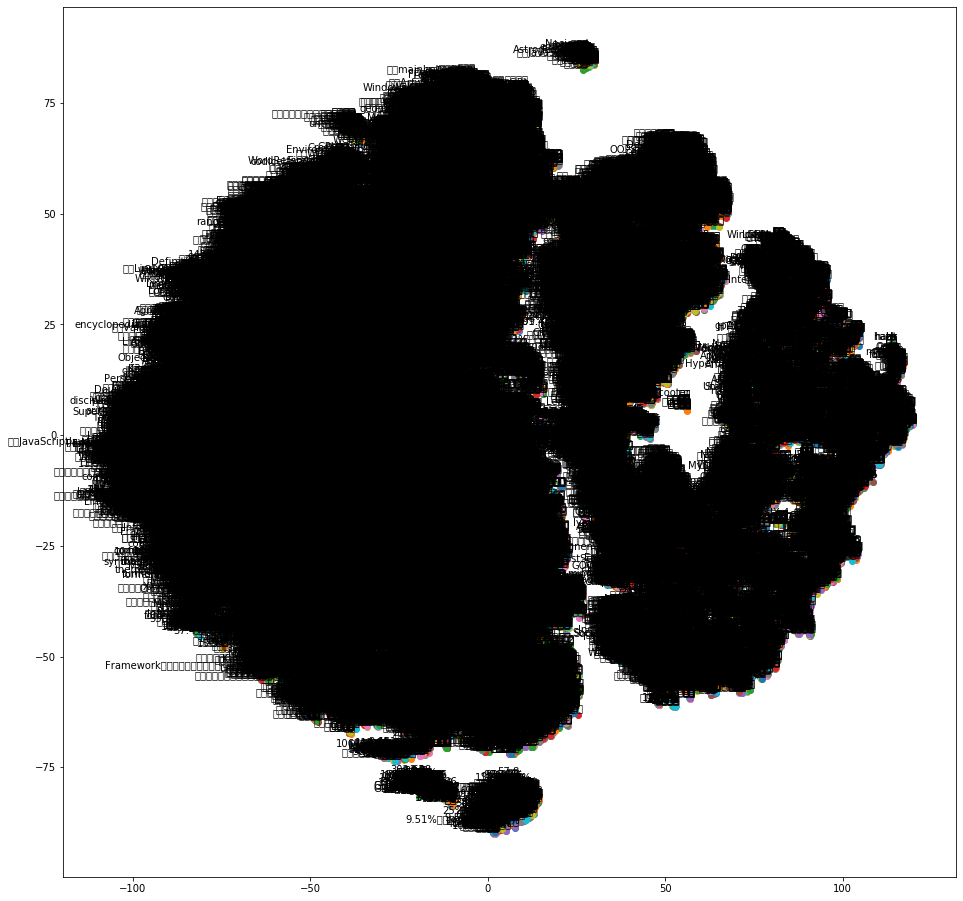

In [4]:
import gensim

# Load pre-trained Word2Vec model.
model = gensim.models.Word2Vec.load("word2vec.model")
tsne_plot(model)